### Linear Regression PDF page 38

#### 최소제곱법과 LinearRegression

In [1]:
import numpy as np

# 이상치 미존재
x1 = np.array([10, 9, 3, 2])
y1 = np.array([90, 80, 50, 30])

# 이상치 존재
x2 = np.array([10, 9, 3, 2, 11])
y2 = np.array([90, 80, 50, 30,40])

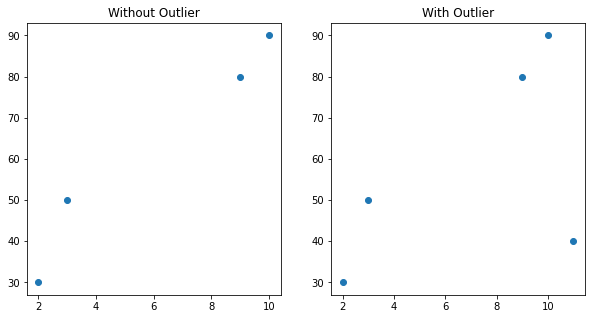

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(x1, y1)
plt.title('Without Outlier')

plt.subplot(1, 2, 2)
plt.scatter(x2, y2)
plt.title('With Outlier')
plt.show()

`최소제곱법(Ordinart Least Squared) 직접 구현`

In [3]:
def OLS(x, y):
    w = np.sum((x-x.mean()) * (y-y.mean())) / np.sum((x-x.mean())**2)
    b = y.mean() - w * x.mean()
    return w, b

`정의된 함수를 이용해서 가중치와 편향을 계산`

In [4]:
w1, b1 = OLS(x1, y1)
w1, b1

(6.6, 22.900000000000006)

In [5]:
w2, b2 = OLS(x2, y2)
w2, b2

(3.4285714285714284, 34.0)

`계산된 가중치와 편향을 사용해서 예측값을 도출`

In [6]:
x1_pred = x1 * w1 + b1
x2_pred = x2 * w2 + b2

`결과 시각화`

`데이타에 이상치값이 포함되어진 경우 실제값과의 오차가 더 커지는 것을 확인할 수 있다.`


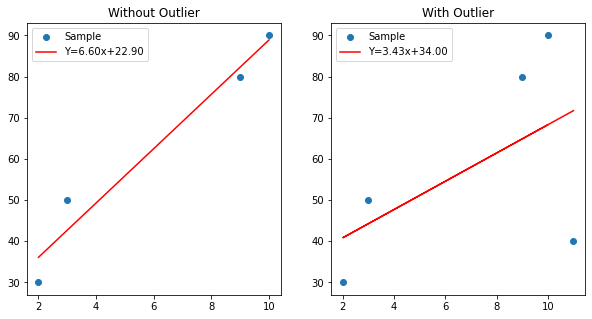

In [7]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(x1, y1, label='Sample')
plt.plot(x1, x1_pred, c='red', label=f'Y={w1:.2f}x+{b1:.2f}')
plt.legend()
plt.title('Without Outlier')

plt.subplot(1, 2, 2)
plt.scatter(x2, y2, label='Sample')
plt.plot(x2, x2_pred, c='red', label=f'Y={w2:.2f}x+{b2:.2f}')
plt.title('With Outlier')
plt.legend()
plt.show()

`LinearRegression은 내부적으로 최소제곱법 알고리즘으로 구현되어져 있다.`  
`LinearRegression의 내부변수 coef_, intercept_를 통해서 가중치와 편향값을 받아볼 수 있다.`

In [8]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression().fit(x1.reshape(-1, 1), y1)
model1.coef_, model1.intercept_

(array([6.6]), 22.899999999999984)

In [9]:
model2 = LinearRegression().fit(x2.reshape(-1, 1), y2)
model2.coef_, model2.intercept_

(array([3.42857143]), 33.99999999999999)